Classifier for my cats 

# Import libraries

In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import random

import keras

import numpy as np

# A library for data visualization
import matplotlib.pyplot as plt

# An advanced library for data visualization
import seaborn as sns

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential

# Importing all the different layers and optimizers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

In [7]:
# Define your data directory
data_dir = 'images/'

# Initialize lists to store images and labels
images = []
labels = []

# Loop through subdirectories (each subdirectory corresponds to a class)
for class_dir in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_dir)
    if os.path.isdir(class_path):
        for img_filename in os.listdir(class_path):
            img_path = os.path.join(class_path, img_filename)
            # Read the image and resize it to your desired size
            img = cv2.imread(img_path)
            img = cv2.resize(img, (200, 200))  # Adjust the size as needed
            
            # Convert BGR image to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            images.append(img)
            labels.append(class_dir)


# Convert the labels to numerical format
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.2, random_state=42)


# Normalize pixel values to the range [0, 1]
# x_train = x_train.astype('float32') / 255
# x_test = x_test.astype('float32') / 255

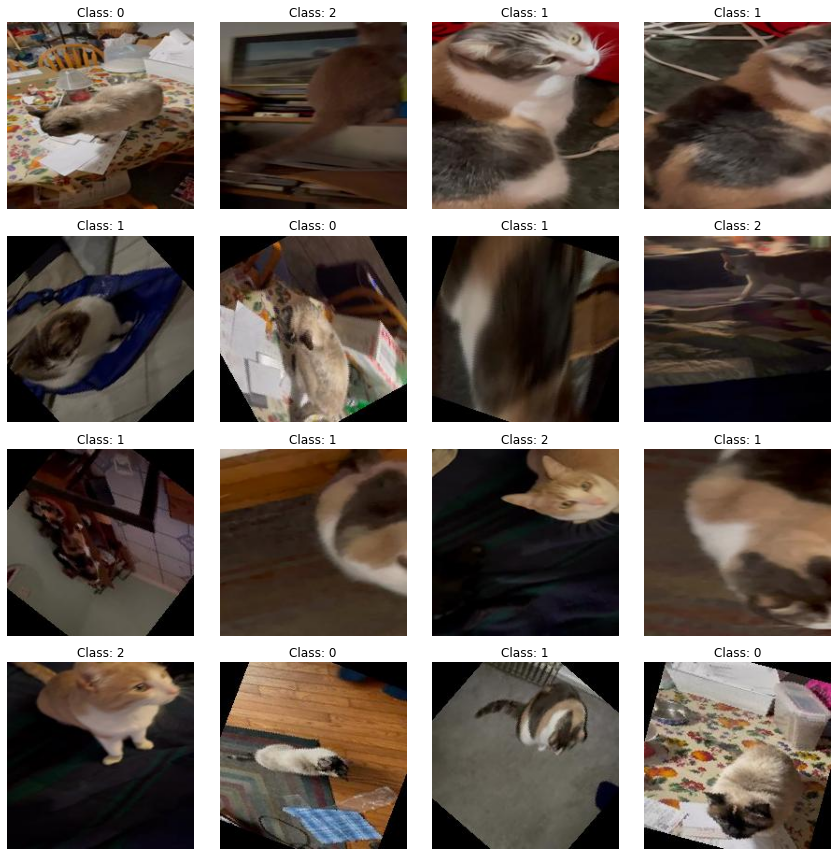

In [8]:
# Define the number of rows and columns in your grid
num_rows = 4
num_cols = 4

# Create a new figure for the grid of images
plt.figure(figsize=(12, 12))

# Generate random indices to select random images from the training set
random_indices = random.sample(range(len(x_train)), num_rows * num_cols)

# Loop through the random indices and display the corresponding images
for i, idx in enumerate(random_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_train[idx])
    plt.title(f'Class: {y_train[idx]}')
    plt.axis('off')  # Turn off axis labels

# Adjust the spacing between the subplots for better readability
plt.tight_layout()

# Show the grid of random images
plt.show()

In [9]:
x_train.shape

(2048, 200, 200, 3)

In [10]:
x_train[0]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

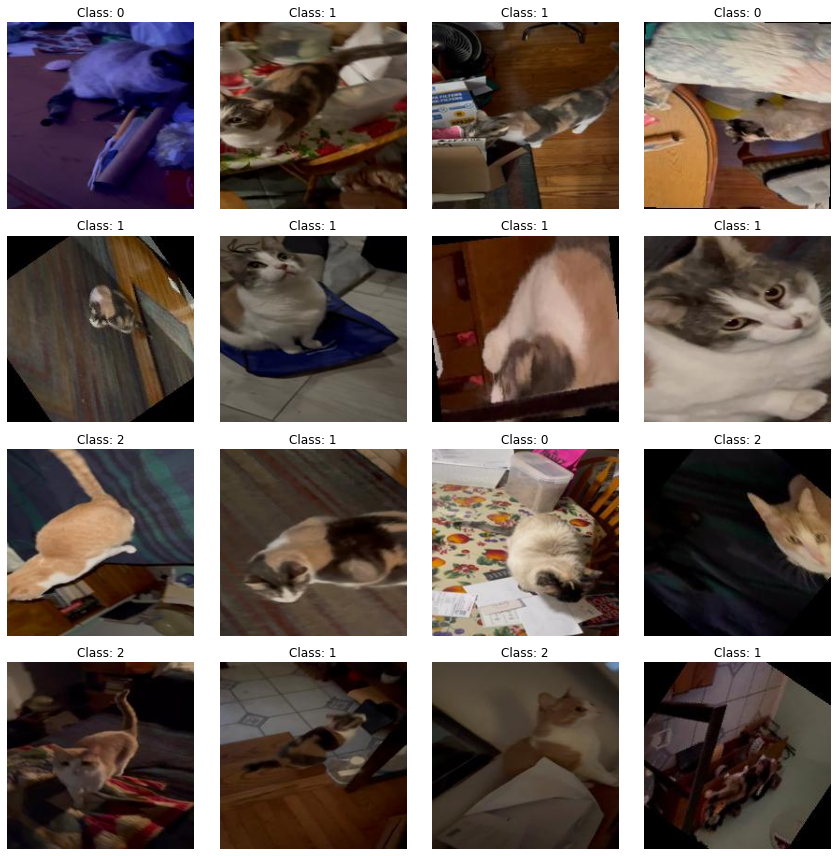

In [11]:
# Define the number of rows and columns in your grid
num_rows = 4
num_cols = 4

# Create a new figure for the grid of images
plt.figure(figsize=(12, 12))

# Generate random indices to select random images from the training set
random_indices = random.sample(range(len(x_test)), num_rows * num_cols)

# Loop through the random indices and display the corresponding images
for i, idx in enumerate(random_indices):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(x_test[idx])
    plt.title(f'Class: {y_test[idx]}')
    plt.axis('off')  # Turn off axis labels

# Adjust the spacing between the subplots for better readability
plt.tight_layout()

# Show the grid of random images
plt.show()

In [12]:
x_test.shape

(512, 200, 200, 3)

In [13]:
# Normalizing the image pixels
x_train_normalized = x_train/255

x_test_normalized = x_test/255

In [14]:
# Creating one-hot encoded representation of target labels

# We can do this by using this utility function - https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train)

y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [15]:
y_train_encoded

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

# Model 1

In [11]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [12]:
# Initialized a sequential model
model_1 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of CIFAR images
model_1.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (200, 200, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_1.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_1.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_1.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_1.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model_1.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_1.add(LeakyReLU(0.1))

# Adding the output layer with 3 neurons and 'softmax' activation function (for a multi-class classification problem)
model_1.add(Dense(3, activation = 'softmax'))

In [13]:
# Printing the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                        

In [14]:
model_1.compile(

    loss = 'categorical_crossentropy',

    # Using Adam optimizer with 0.005 learning rate, by default it is 0.001
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),

    metrics=['accuracy']
)

In [15]:
history_1 = model_1.fit(

            x_train_normalized, y_train_encoded,

            epochs = 10,

            validation_split = 0.1,

            shuffle = True,

            verbose = 2
)

Epoch 1/10
58/58 - 76s - loss: 5.5379 - accuracy: 0.5149 - val_loss: 0.8494 - val_accuracy: 0.6244 - 76s/epoch - 1s/step
Epoch 2/10
58/58 - 75s - loss: 0.6859 - accuracy: 0.7211 - val_loss: 0.7854 - val_accuracy: 0.6341 - 75s/epoch - 1s/step
Epoch 3/10
58/58 - 75s - loss: 0.5516 - accuracy: 0.7922 - val_loss: 0.6727 - val_accuracy: 0.7317 - 75s/epoch - 1s/step
Epoch 4/10
58/58 - 74s - loss: 0.3869 - accuracy: 0.8600 - val_loss: 0.5819 - val_accuracy: 0.7610 - 74s/epoch - 1s/step
Epoch 5/10
58/58 - 73s - loss: 0.2622 - accuracy: 0.9148 - val_loss: 0.6039 - val_accuracy: 0.7512 - 73s/epoch - 1s/step
Epoch 6/10
58/58 - 73s - loss: 0.1675 - accuracy: 0.9577 - val_loss: 0.6319 - val_accuracy: 0.7366 - 73s/epoch - 1s/step
Epoch 7/10
58/58 - 73s - loss: 0.1015 - accuracy: 0.9788 - val_loss: 0.5999 - val_accuracy: 0.7756 - 73s/epoch - 1s/step
Epoch 8/10
58/58 - 74s - loss: 0.0633 - accuracy: 0.9875 - val_loss: 0.6335 - val_accuracy: 0.7512 - 74s/epoch - 1s/step
Epoch 9/10
58/58 - 73s - loss: 0

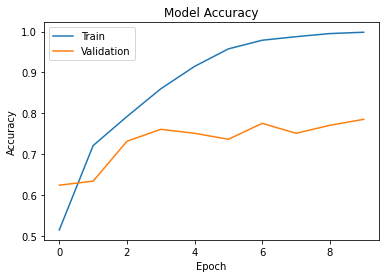

In [17]:
plt.plot(history_1.history['accuracy'])

plt.plot(history_1.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [18]:
# Save the entire model to a file
model_1.save('my_trained_model.h5')

# You can also save the training history if you want
import pickle

with open('training_history.pkl', 'wb') as file:
    pickle.dump(history_1.history, file)

C:\Users\Grego\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 184ms/step


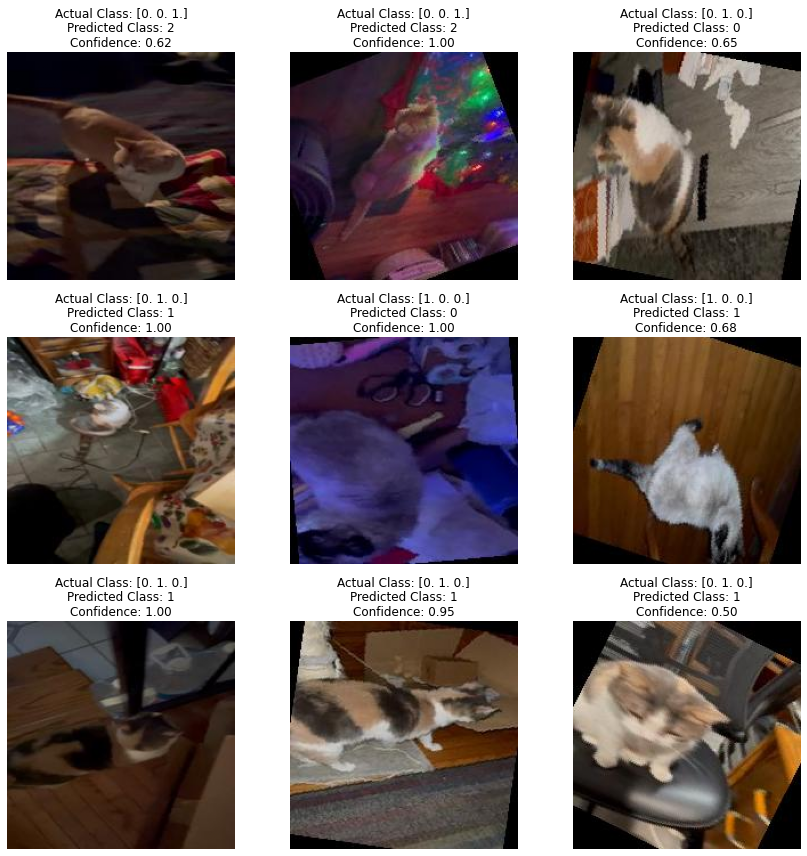

In [19]:
# Load the saved model
loaded_model = load_model('my_trained_model.h5')

# Function to make predictions and display results
def predict_and_display(model, images, actual_labels):
    predictions = model.predict(images)
    
    # Get the predicted classes and their associated confidence scores
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    
    # Display the images, actual class, and predicted class (indices)
    num_images = len(images)
    
    plt.figure(figsize=(12, 12))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Actual Class: {actual_labels[i]}\nPredicted Class: {predicted_classes[i]}\nConfidence: {confidence_scores[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Randomly select 9 images from x_test for prediction
random_indices = np.random.choice(len(x_test), 9, replace=False)
random_images = x_test_normalized[random_indices]
actual_labels = y_test_encoded[random_indices]  # Actual class indices

# Make predictions and display the results
predict_and_display(loaded_model, random_images, actual_labels)

# Model 2

In [16]:
# Clearing the backend
from tensorflow.keras import backend

backend.clear_session()

In [17]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [27]:
# Initialized a sequential model
model_2 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes the input dimension of CIFAR images
model_2.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (200, 200, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 20% neurons to reduce overfitting
model_2.add(Dropout(0.2))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_2.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 20% neurons to reduce overfitting
model_2.add(Dropout(0.2))

# Adding max pooling to reduce the size of output of second convolutional layer
model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model_2.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# Adding dropout to randomly switch off 50% neurons to reduce overfitting
model_2.add(Dropout(0.5))

# Adding the output layer with 10 neurons and 'softmax'  activation function since this is a multi-class classification problem
model_2.add(Dense(3, activation = 'softmax'))

In [28]:
# Printing the model summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 16)      0         
                                                                 
 dropout (Dropout)           (None, 200, 200, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 dropout_1 (Dropout)         (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0

In [29]:
# Compiling the model
model_2.compile(

    loss = 'categorical_crossentropy',

    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),

    metrics=['accuracy']
)

In [30]:
# Fitting the model
history_2 = model_2.fit(

            x_train_normalized, y_train_encoded,

            epochs = 10,

            validation_split = 0.1,

            shuffle = True,

            verbose = 2
)

Epoch 1/10
29/29 - 45s - loss: 39.0240 - accuracy: 0.3355 - val_loss: 30.6576 - val_accuracy: 0.2621 - 45s/epoch - 2s/step
Epoch 2/10
29/29 - 44s - loss: 1.5298 - accuracy: 0.4093 - val_loss: 29.1217 - val_accuracy: 0.2621 - 44s/epoch - 2s/step
Epoch 3/10
29/29 - 45s - loss: 1.1554 - accuracy: 0.5038 - val_loss: 24.9224 - val_accuracy: 0.2621 - 45s/epoch - 2s/step
Epoch 4/10
29/29 - 45s - loss: 1.0412 - accuracy: 0.5309 - val_loss: 22.5801 - val_accuracy: 0.2621 - 45s/epoch - 2s/step
Epoch 5/10
29/29 - 45s - loss: 0.9360 - accuracy: 0.5722 - val_loss: 19.5881 - val_accuracy: 0.2621 - 45s/epoch - 2s/step
Epoch 6/10
29/29 - 43s - loss: 0.8967 - accuracy: 0.6145 - val_loss: 18.9937 - val_accuracy: 0.2718 - 43s/epoch - 1s/step
Epoch 7/10
29/29 - 43s - loss: 0.8492 - accuracy: 0.6308 - val_loss: 15.8300 - val_accuracy: 0.2718 - 43s/epoch - 1s/step
Epoch 8/10
29/29 - 43s - loss: 0.7652 - accuracy: 0.6602 - val_loss: 13.7797 - val_accuracy: 0.2718 - 43s/epoch - 1s/step
Epoch 9/10
29/29 - 44s 

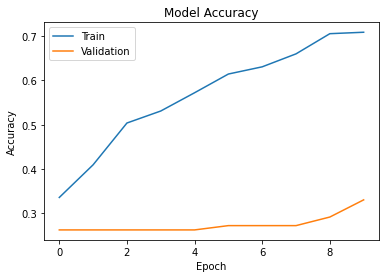

In [31]:
plt.plot(history_2.history['accuracy'])

plt.plot(history_2.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [32]:
# Save the entire model to a file
model_2.save('my_trained_model2.h5')

# You can also save the training history if you want
import pickle

with open('training_history2.pkl', 'wb') as file:
    pickle.dump(history_2.history, file)

1/1 [==============================] - 0s 115ms/step


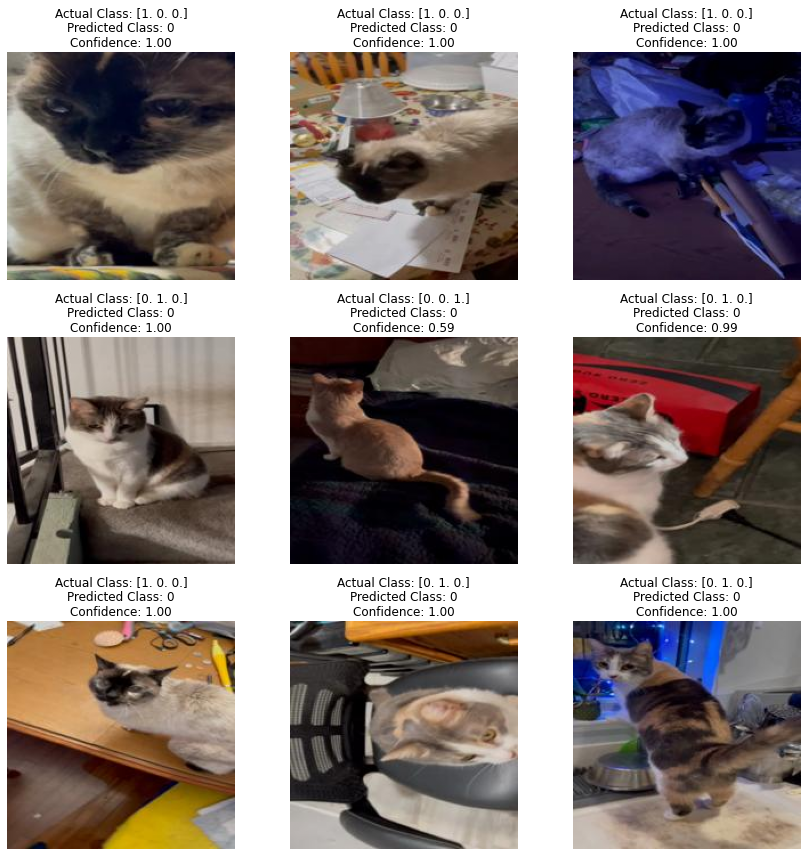

In [33]:
# Load the saved model
loaded_model = load_model('my_trained_model2.h5')

# Function to make predictions and display results
def predict_and_display(model, images, actual_labels):
    predictions = model.predict(images)
    
    # Get the predicted classes and their associated confidence scores
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    
    # Display the images, actual class, and predicted class (indices)
    num_images = len(images)
    
    plt.figure(figsize=(12, 12))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Actual Class: {actual_labels[i]}\nPredicted Class: {predicted_classes[i]}\nConfidence: {confidence_scores[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Randomly select 9 images from x_test for prediction
random_indices = np.random.choice(len(x_test), 9, replace=False)
random_images = x_test_normalized[random_indices]
actual_labels = y_test_encoded[random_indices]  # Actual class indices

# Make predictions and display the results
predict_and_display(loaded_model, random_images, actual_labels)

# Model 3

In [18]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [35]:
# Initialized a sequential model
model_3 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of CIFAR images
model_3.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (200, 200, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_3.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_3.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_3.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model_3.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3.add(LeakyReLU(0.1))

# Adding the output layer with 3 neurons and 'softmax' activation function (for a multi-class classification problem)
model_3.add(Dense(3, activation = 'softmax'))

In [36]:
# Printing the model summary
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                        

In [37]:
model_3.compile(

    loss = 'categorical_crossentropy',

    # Using Adam optimizer with 0.005 learning rate, by default it is 0.001
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),

    metrics=['accuracy']
)

In [38]:
history_3 = model_3.fit(

            x_train_normalized, y_train_encoded,

            epochs = 15,

            validation_split = 0.1,

            shuffle = True,

            verbose = 2
)

Epoch 1/15
29/29 - 37s - loss: 8.1005 - accuracy: 0.4300 - val_loss: 0.9363 - val_accuracy: 0.6311 - 37s/epoch - 1s/step
Epoch 2/15
29/29 - 35s - loss: 0.7620 - accuracy: 0.6678 - val_loss: 0.8061 - val_accuracy: 0.6990 - 35s/epoch - 1s/step
Epoch 3/15
29/29 - 36s - loss: 0.6026 - accuracy: 0.7818 - val_loss: 0.6817 - val_accuracy: 0.7670 - 36s/epoch - 1s/step
Epoch 4/15
29/29 - 37s - loss: 0.4717 - accuracy: 0.8447 - val_loss: 0.6210 - val_accuracy: 0.7670 - 37s/epoch - 1s/step
Epoch 5/15
29/29 - 36s - loss: 0.4047 - accuracy: 0.8643 - val_loss: 0.5662 - val_accuracy: 0.7864 - 36s/epoch - 1s/step
Epoch 6/15
29/29 - 35s - loss: 0.3012 - accuracy: 0.8871 - val_loss: 0.5350 - val_accuracy: 0.7476 - 35s/epoch - 1s/step
Epoch 7/15
29/29 - 35s - loss: 0.2030 - accuracy: 0.9414 - val_loss: 0.4908 - val_accuracy: 0.8058 - 35s/epoch - 1s/step
Epoch 8/15
29/29 - 35s - loss: 0.1507 - accuracy: 0.9653 - val_loss: 0.4680 - val_accuracy: 0.8447 - 35s/epoch - 1s/step
Epoch 9/15
29/29 - 35s - loss: 0

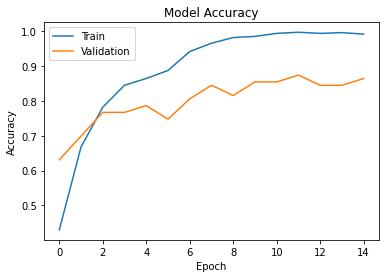

In [39]:
plt.plot(history_3.history['accuracy'])

plt.plot(history_3.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [40]:
# Save the entire model to a file
model_1.save('my_trained_model3.h5')

# You can also save the training history if you want
import pickle

with open('training_history3.pkl', 'wb') as file:
    pickle.dump(history_3.history, file)

1/1 [==============================] - 0s 109ms/step


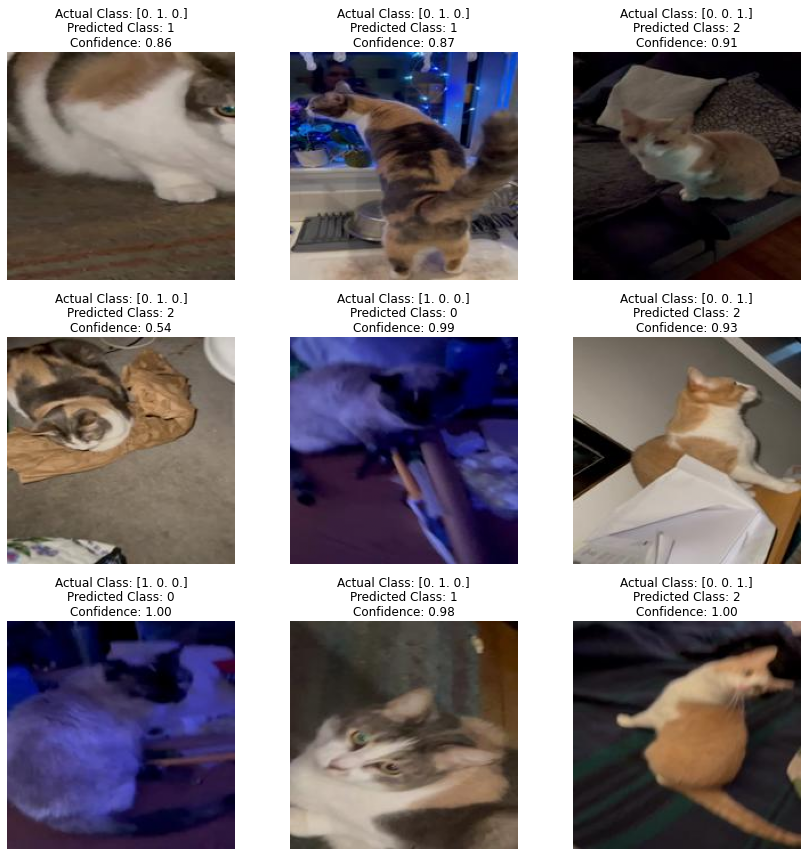

In [41]:
# Load the saved model
loaded_model = load_model('my_trained_model3.h5')

# Function to make predictions and display results
def predict_and_display(model, images, actual_labels):
    predictions = model.predict(images)
    
    # Get the predicted classes and their associated confidence scores
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    
    # Display the images, actual class, and predicted class (indices)
    num_images = len(images)
    
    plt.figure(figsize=(12, 12))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Actual Class: {actual_labels[i]}\nPredicted Class: {predicted_classes[i]}\nConfidence: {confidence_scores[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Randomly select 9 images from x_test for prediction
random_indices = np.random.choice(len(x_test), 9, replace=False)
random_images = x_test_normalized[random_indices]
actual_labels = y_test_encoded[random_indices]  # Actual class indices

# Make predictions and display the results
predict_and_display(loaded_model, random_images, actual_labels)

# Model 3 - more images

In [24]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [25]:
# Initialized a sequential model
model_3_expanded = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of CIFAR images
model_3_expanded.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (200, 200, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3_expanded.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_3_expanded.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3_expanded.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_3_expanded.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_3_expanded.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model_3_expanded.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_3_expanded.add(LeakyReLU(0.1))

# Adding the output layer with 3 neurons and 'softmax' activation function (for a multi-class classification problem)
model_3_expanded.add(Dense(3, activation = 'softmax'))

In [26]:
# Printing the model summary
model_3_expanded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                        

In [27]:
model_3_expanded.compile(

    loss = 'categorical_crossentropy',

    # Using Adam optimizer with 0.005 learning rate, by default it is 0.001
    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),

    metrics=['accuracy']
)

In [29]:
history_3_expanded = model_3_expanded.fit(

            x_train_normalized, y_train_encoded,

            epochs = 10,

            validation_split = 0.1,

            shuffle = True,

            verbose = 2
)

Epoch 1/10
58/58 - 83s - loss: 11.1190 - accuracy: 0.4422 - val_loss: 0.9966 - val_accuracy: 0.5366 - 83s/epoch - 1s/step
Epoch 2/10
58/58 - 75s - loss: 0.9236 - accuracy: 0.5692 - val_loss: 0.8454 - val_accuracy: 0.6439 - 75s/epoch - 1s/step
Epoch 3/10
58/58 - 75s - loss: 0.7575 - accuracy: 0.6701 - val_loss: 0.7314 - val_accuracy: 0.6537 - 75s/epoch - 1s/step
Epoch 4/10
58/58 - 77s - loss: 0.6265 - accuracy: 0.7482 - val_loss: 0.6793 - val_accuracy: 0.6780 - 77s/epoch - 1s/step
Epoch 5/10
58/58 - 76s - loss: 0.4967 - accuracy: 0.8047 - val_loss: 0.5951 - val_accuracy: 0.7415 - 76s/epoch - 1s/step
Epoch 6/10
58/58 - 75s - loss: 0.4233 - accuracy: 0.8443 - val_loss: 0.6273 - val_accuracy: 0.6927 - 75s/epoch - 1s/step
Epoch 7/10
58/58 - 74s - loss: 0.3721 - accuracy: 0.8589 - val_loss: 0.5767 - val_accuracy: 0.7073 - 74s/epoch - 1s/step
Epoch 8/10
58/58 - 76s - loss: 0.2828 - accuracy: 0.9040 - val_loss: 0.5291 - val_accuracy: 0.7659 - 76s/epoch - 1s/step
Epoch 9/10
58/58 - 78s - loss: 

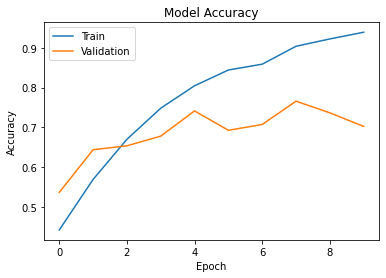

In [30]:
plt.plot(history_3_expanded.history['accuracy'])

plt.plot(history_3_expanded.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [32]:
# Save the entire model to a file
model_3_expanded.save('my_trained_model3_expanded.h5')

# You can also save the training history if you want
import pickle

with open('training_history3_expanded.pkl', 'wb') as file:
    pickle.dump(history_3_expanded.history, file)

C:\Users\Grego\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 157ms/step


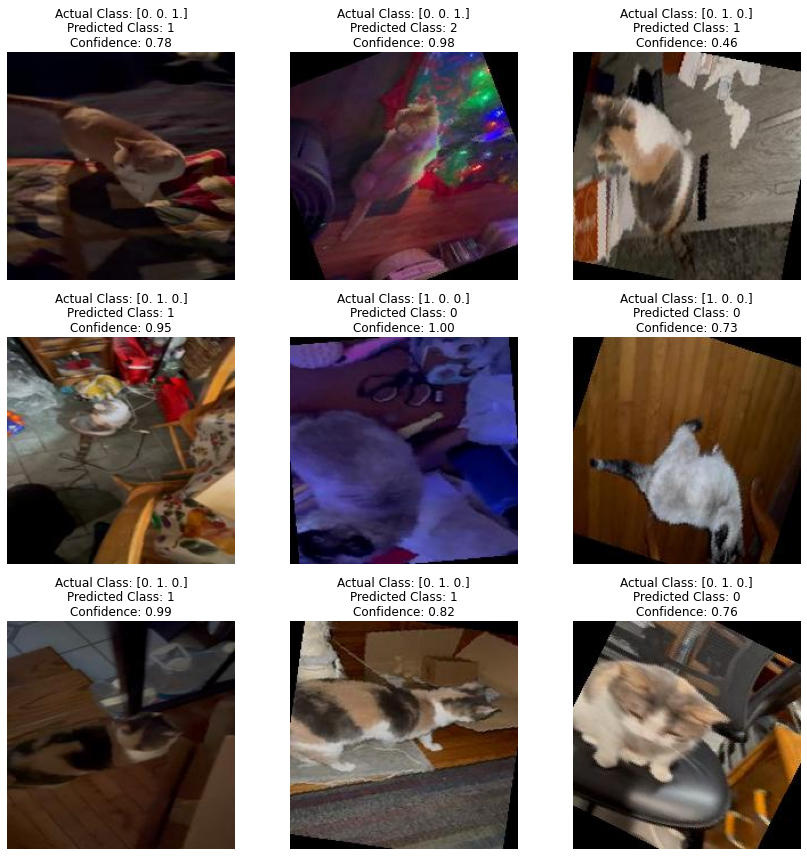

In [33]:
# Load the saved model
loaded_model = load_model('my_trained_model3_expanded.h5')

# Function to make predictions and display results
def predict_and_display(model, images, actual_labels):
    predictions = model.predict(images)
    
    # Get the predicted classes and their associated confidence scores
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    
    # Display the images, actual class, and predicted class (indices)
    num_images = len(images)
    
    plt.figure(figsize=(12, 12))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Actual Class: {actual_labels[i]}\nPredicted Class: {predicted_classes[i]}\nConfidence: {confidence_scores[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Randomly select 9 images from x_test for prediction
random_indices = np.random.choice(len(x_test), 9, replace=False)
random_images = x_test_normalized[random_indices]
actual_labels = y_test_encoded[random_indices]  # Actual class indices

# Make predictions and display the results
predict_and_display(loaded_model, random_images, actual_labels)

# Model 4

In [52]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [53]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [54]:
# Initialized a sequential model
model_4 = Sequential()

# Adding the first convolutional layer with 16 filters and the kernel size of 3x3, and 'same' padding

# The input_shape denotes input dimension of CIFAR images
model_4.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", input_shape = (200, 200, 3)))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_4.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 32 filters and the kernel size of 3x3
model_4.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same'))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_4.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of second convolutional layer
model_4.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the 3-d output of the convolutional layer after max pooling to make it ready for creating dense connections
model_4.add(Flatten())

# Adding a fully connected dense layer with 256 neurons
model_4.add(Dense(256))

# Adding LeakyRelu activation function with a negative slope of 0.1
model_4.add(LeakyReLU(0.1))

# Adding the output layer with 3 neurons and 'softmax' activation function (for a multi-class classification problem)
model_4.add(Dense(3, activation = 'softmax'))

In [55]:
# Printing the model summary
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 320000)            0         
                                                        

In [56]:
# Compiling the model
model_4.compile(

    loss = 'categorical_crossentropy',

    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),

    metrics=['accuracy']
)

In [57]:
# Fitting the model
history_4 = model_4.fit(

            x_train_normalized, y_train_encoded,

            epochs = 25,

            validation_split = 0.1,

            shuffle = True,

            verbose = 2
)

Epoch 1/25
29/29 - 43s - loss: 14.4991 - accuracy: 0.4354 - val_loss: 1.0084 - val_accuracy: 0.5534 - 43s/epoch - 1s/step
Epoch 2/25
29/29 - 37s - loss: 0.8042 - accuracy: 0.6308 - val_loss: 0.7745 - val_accuracy: 0.7184 - 37s/epoch - 1s/step
Epoch 3/25
29/29 - 37s - loss: 0.6669 - accuracy: 0.7763 - val_loss: 0.6811 - val_accuracy: 0.7282 - 37s/epoch - 1s/step
Epoch 4/25
29/29 - 36s - loss: 0.5516 - accuracy: 0.8371 - val_loss: 0.6499 - val_accuracy: 0.7282 - 36s/epoch - 1s/step
Epoch 5/25
29/29 - 36s - loss: 0.4538 - accuracy: 0.8621 - val_loss: 0.5546 - val_accuracy: 0.7864 - 36s/epoch - 1s/step
Epoch 6/25
29/29 - 36s - loss: 0.3552 - accuracy: 0.8990 - val_loss: 0.4749 - val_accuracy: 0.8155 - 36s/epoch - 1s/step
Epoch 7/25
29/29 - 36s - loss: 0.2597 - accuracy: 0.9392 - val_loss: 0.4185 - val_accuracy: 0.8544 - 36s/epoch - 1s/step
Epoch 8/25
29/29 - 36s - loss: 0.2048 - accuracy: 0.9511 - val_loss: 0.3819 - val_accuracy: 0.8544 - 36s/epoch - 1s/step
Epoch 9/25
29/29 - 35s - loss: 

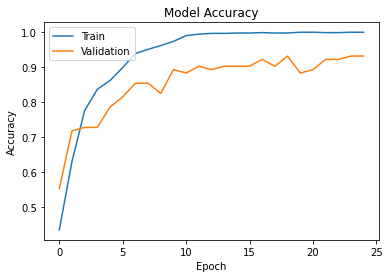

In [58]:
plt.plot(history_4.history['accuracy'])

plt.plot(history_4.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [59]:
# Save the entire model to a file
model_4.save('my_trained_model4.h5')

# You can also save the training history if you want
import pickle

with open('training_history4.pkl', 'wb') as file:
    pickle.dump(history_4.history, file)

C:\Users\Grego\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 108ms/step


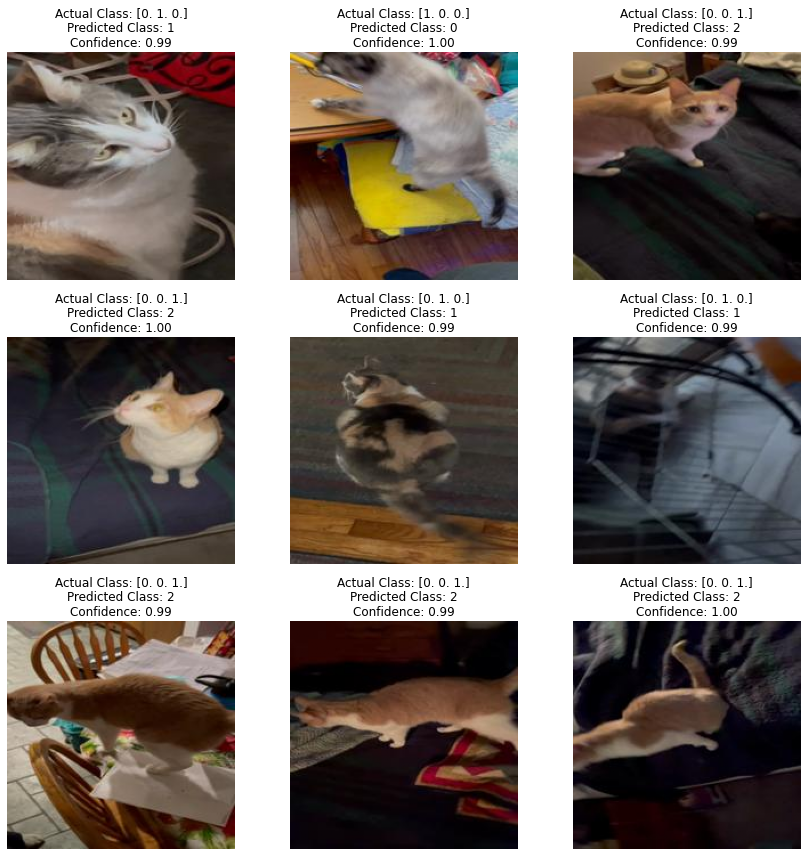

In [60]:
# Load the saved model
loaded_model = load_model('my_trained_model4.h5')

# Function to make predictions and display results
def predict_and_display(model, images, actual_labels):
    predictions = model.predict(images)
    
    # Get the predicted classes and their associated confidence scores
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    
    # Display the images, actual class, and predicted class (indices)
    num_images = len(images)
    
    plt.figure(figsize=(12, 12))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Actual Class: {actual_labels[i]}\nPredicted Class: {predicted_classes[i]}\nConfidence: {confidence_scores[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Randomly select 9 images from x_test for prediction
random_indices = np.random.choice(len(x_test), 9, replace=False)
random_images = x_test_normalized[random_indices]
actual_labels = y_test_encoded[random_indices]  # Actual class indices

# Make predictions and display the results
predict_and_display(loaded_model, random_images, actual_labels)

# Model 5

In [61]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [62]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [63]:
# Increase depth and width of the neural network
model_5 = Sequential()

# Adding the first convolutional layer with 32 filters and the kernel size of 3x3, and 'same' padding
model_5.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=(200, 200, 3)))
model_5.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 64 filters and the kernel size of 3x3
model_5.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model_5.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of the second convolutional layer
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# Adding the third convolutional layer with 128 filters and the kernel size of 3x3
model_5.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model_5.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 128 filters and the kernel size of 3x3
model_5.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model_5.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of the fourth convolutional layer
model_5.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 3D output of the convolutional layer after max pooling to make it ready for creating dense connections
model_5.add(Flatten())

# Adding a fully connected dense layer with 512 neurons
model_5.add(Dense(512))
model_5.add(LeakyReLU(0.1))

# Adding a dropout layer for regularization (optional)
model_5.add(Dropout(0.5))

# Adding the output layer with 3 neurons and 'softmax' activation function (for a multi-class classification problem)
model_5.add(Dense(3, activation='softmax'))

In [64]:
# Printing the model summary
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 64)      18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 200, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 128)     73856     
                                                        

In [65]:
# Compiling the model
model_5.compile(

    loss = 'categorical_crossentropy',

    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.005),

    metrics=['accuracy']
)

In [66]:
# Fitting the model
history_5 = model_5.fit(

            x_train_normalized, y_train_encoded,

            epochs = 10,

            validation_split = 0.1,

            shuffle = True,

            verbose = 2
)

Epoch 1/10
29/29 - 127s - loss: 49.6801 - accuracy: 0.3659 - val_loss: 1.3400 - val_accuracy: 0.3981 - 127s/epoch - 4s/step
Epoch 2/10
29/29 - 125s - loss: 1.1580 - accuracy: 0.4300 - val_loss: 0.9652 - val_accuracy: 0.5243 - 125s/epoch - 4s/step
Epoch 3/10
29/29 - 125s - loss: 0.9979 - accuracy: 0.5223 - val_loss: 0.9060 - val_accuracy: 0.6214 - 125s/epoch - 4s/step
Epoch 4/10
29/29 - 125s - loss: 0.9388 - accuracy: 0.5472 - val_loss: 1.0002 - val_accuracy: 0.5340 - 125s/epoch - 4s/step
Epoch 5/10
29/29 - 125s - loss: 0.8878 - accuracy: 0.6004 - val_loss: 0.9123 - val_accuracy: 0.5922 - 125s/epoch - 4s/step
Epoch 6/10
29/29 - 124s - loss: 0.8659 - accuracy: 0.6080 - val_loss: 0.8258 - val_accuracy: 0.5825 - 124s/epoch - 4s/step
Epoch 7/10
29/29 - 125s - loss: 0.7583 - accuracy: 0.6710 - val_loss: 0.9128 - val_accuracy: 0.6117 - 125s/epoch - 4s/step
Epoch 8/10
29/29 - 125s - loss: 0.7136 - accuracy: 0.6927 - val_loss: 0.7114 - val_accuracy: 0.7087 - 125s/epoch - 4s/step
Epoch 9/10
29/2

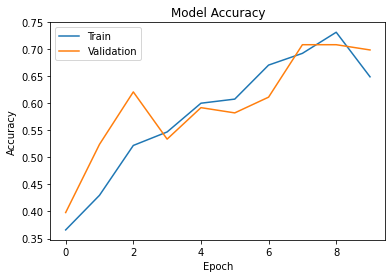

In [67]:
plt.plot(history_5.history['accuracy'])

plt.plot(history_5.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [68]:
# Save the entire model to a file
model_4.save('my_trained_model4.h5')

# You can also save the training history if you want
import pickle

with open('training_history4.pkl', 'wb') as file:
    pickle.dump(history_4.history, file)

1/1 [==============================] - 0s 117ms/step


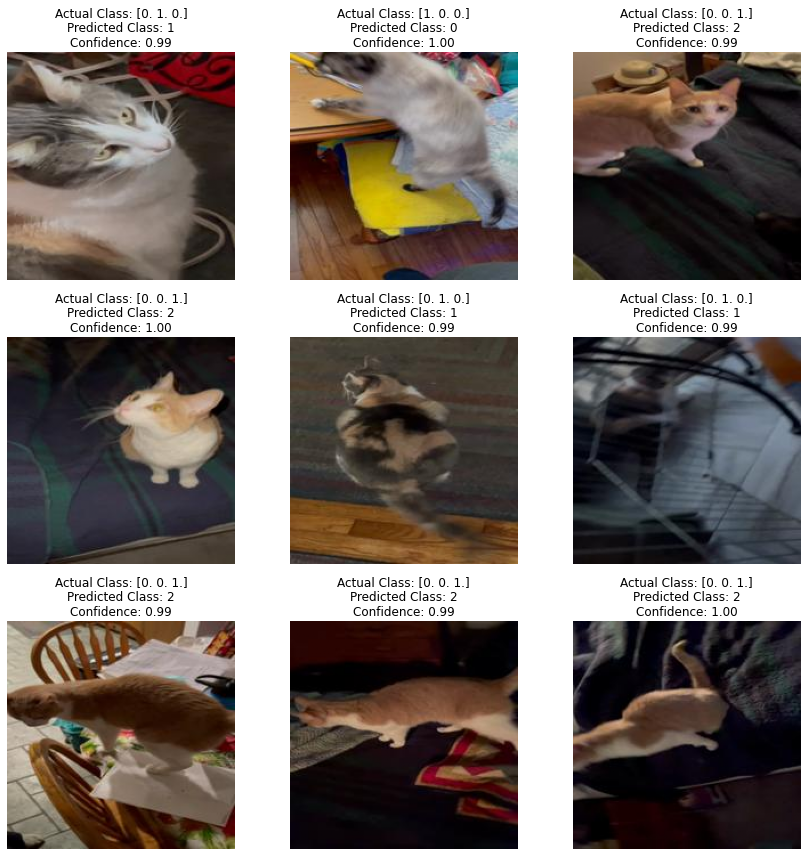

In [69]:
# Load the saved model
loaded_model = load_model('my_trained_model4.h5')

# Function to make predictions and display results
def predict_and_display(model, images, actual_labels):
    predictions = model.predict(images)
    
    # Get the predicted classes and their associated confidence scores
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    
    # Display the images, actual class, and predicted class (indices)
    num_images = len(images)
    
    plt.figure(figsize=(12, 12))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Actual Class: {actual_labels[i]}\nPredicted Class: {predicted_classes[i]}\nConfidence: {confidence_scores[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Randomly select 9 images from x_test for prediction
random_indices = np.random.choice(len(x_test), 9, replace=False)
random_images = x_test_normalized[random_indices]
actual_labels = y_test_encoded[random_indices]  # Actual class indices

# Make predictions and display the results
predict_and_display(loaded_model, random_images, actual_labels)

# Model 6

In [299]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

In [300]:
# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [301]:
# Increase depth and width of the neural network
model_6 = Sequential()

# Adding the first convolutional layer with 32 filters and the kernel size of 3x3, and 'same' padding
model_6.add(Conv2D(filters=8, kernel_size=(3, 3), padding="same", input_shape=(200, 200, 3)))
model_6.add(LeakyReLU(0.1))

# Adding the second convolutional layer with 64 filters and the kernel size of 3x3
model_6.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same'))
model_6.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of the second convolutional layer
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model_6.add(Dropout(0.25))

# Adding the third convolutional layer with 128 filters and the kernel size of 3x3
model_6.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model_6.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 128 filters and the kernel size of 3x3
model_6.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model_6.add(LeakyReLU(0.1))

# Adding max pooling to reduce the size of the output of the fourth convolutional layer
model_6.add(MaxPooling2D(pool_size=(2, 2)))

# Adding dropout to randomly switch off 25% of the network to reduce overfitting
model_6.add(Dropout(0.25))

# Adding the fourth convolutional layer with 128 filters and the kernel size of 3x3
model_6.add(Conv2D(filters=124, kernel_size=(3, 3), padding='same'))
model_6.add(LeakyReLU(0.1))

# Adding the fourth convolutional layer with 128 filters and the kernel size of 3x3
model_6.add(Conv2D(filters=248, kernel_size=(3, 3), padding='same'))
model_6.add(LeakyReLU(0.1))

# Flattening the 3D output of the convolutional layer after max pooling to make it ready for creating dense connections
model_6.add(Flatten())

# Adding a fully connected dense layer with 512 neurons
model_6.add(Dense(248))
model_6.add(LeakyReLU(0.1))

# Adding a dropout layer for regularization (optional)
model_6.add(Dropout(0.5))

# Adding the output layer with 3 neurons and 'softmax' activation function (for a multi-class classification problem)
model_6.add(Dense(3, activation='softmax'))

In [302]:
# Printing the model summary
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 8)       224       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 200, 200, 8)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 16)      1168      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 200, 200, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 100, 100, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 100, 16)      0         
                                                        

In [303]:
# Compiling the model
model_6.compile(

    loss = 'categorical_crossentropy',

    optimizer = tf.keras.optimizers.Adamax(learning_rate = 0.001),

    metrics=['accuracy']
)

In [304]:
# Fitting the model
history_6 = model_6.fit(

            x_train_normalized, y_train_encoded,

            epochs = 10,

            validation_split = 0.2,

            shuffle = True,

            verbose = 2
)

Epoch 1/10
26/26 - 75s - loss: 1.2576 - accuracy: 0.4383 - val_loss: 1.0555 - val_accuracy: 0.4195 - 75s/epoch - 3s/step
Epoch 2/10
26/26 - 73s - loss: 0.9721 - accuracy: 0.5568 - val_loss: 0.8714 - val_accuracy: 0.6293 - 73s/epoch - 3s/step
Epoch 3/10
26/26 - 72s - loss: 0.8548 - accuracy: 0.6044 - val_loss: 0.7056 - val_accuracy: 0.7220 - 72s/epoch - 3s/step
Epoch 4/10
26/26 - 73s - loss: 0.7550 - accuracy: 0.6960 - val_loss: 0.8188 - val_accuracy: 0.6780 - 73s/epoch - 3s/step
Epoch 5/10
26/26 - 73s - loss: 0.5879 - accuracy: 0.7509 - val_loss: 0.5451 - val_accuracy: 0.7902 - 73s/epoch - 3s/step
Epoch 6/10
26/26 - 72s - loss: 0.4954 - accuracy: 0.8217 - val_loss: 0.6730 - val_accuracy: 0.7366 - 72s/epoch - 3s/step
Epoch 7/10
26/26 - 72s - loss: 0.4966 - accuracy: 0.8120 - val_loss: 0.5158 - val_accuracy: 0.7707 - 72s/epoch - 3s/step
Epoch 8/10
26/26 - 73s - loss: 0.2962 - accuracy: 0.9048 - val_loss: 0.4283 - val_accuracy: 0.8439 - 73s/epoch - 3s/step
Epoch 9/10
26/26 - 73s - loss: 0

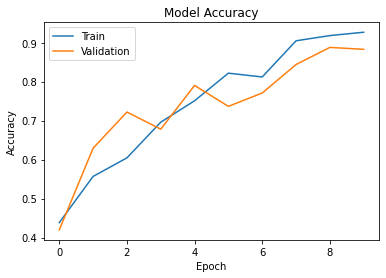

In [305]:
plt.plot(history_6.history['accuracy'])

plt.plot(history_6.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [306]:
# Save the entire model to a file
model_6.save('my_trained_model6.h5')

# You can also save the training history if you want
import pickle

with open('training_history6.pkl', 'wb') as file:
    pickle.dump(history_6.history, file)

C:\Users\Grego\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 233ms/step


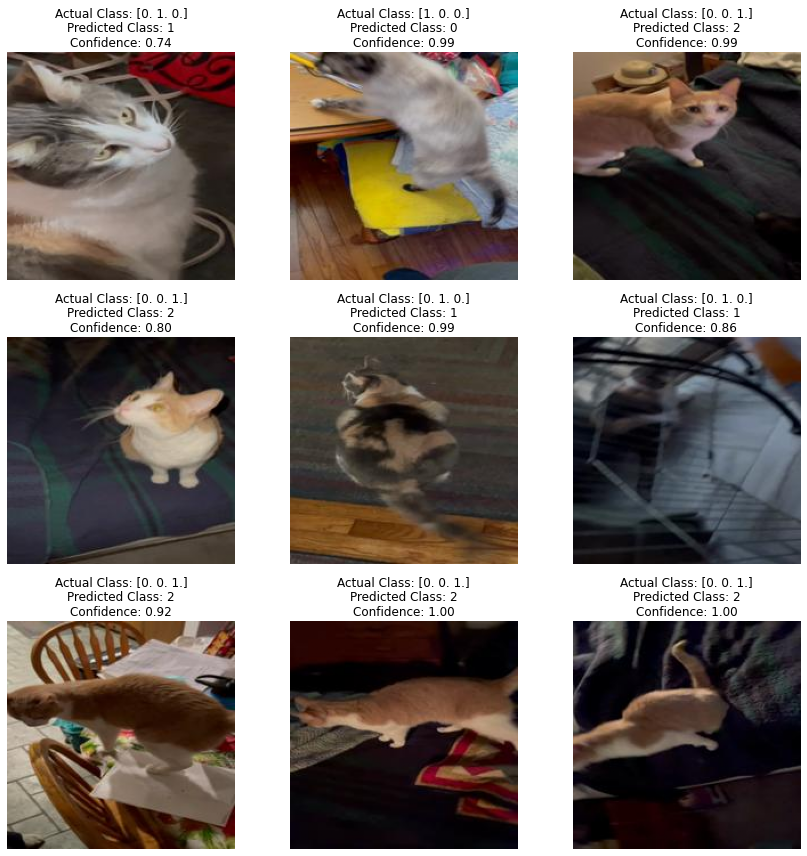

In [307]:
# Load the saved model
loaded_model = load_model('my_trained_model6.h5')

# Function to make predictions and display results
def predict_and_display(model, images, actual_labels):
    predictions = model.predict(images)
    
    # Get the predicted classes and their associated confidence scores
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)
    
    # Display the images, actual class, and predicted class (indices)
    num_images = len(images)
    
    plt.figure(figsize=(12, 12))
    
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f'Actual Class: {actual_labels[i]}\nPredicted Class: {predicted_classes[i]}\nConfidence: {confidence_scores[i]:.2f}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Randomly select 9 images from x_test for prediction
random_indices = np.random.choice(len(x_test), 9, replace=False)
random_images = x_test_normalized[random_indices]
actual_labels = y_test_encoded[random_indices]  # Actual class indices

# Make predictions and display the results
predict_and_display(loaded_model, random_images, actual_labels)

# Testing 

In [42]:
from tensorflow.keras.preprocessing import image as keras_image


In [341]:
def predict_single_image(model_path, image_path, class_labels):
    # Load the saved model
    loaded_model = load_model(model_path)

    # Load and preprocess the image
    # img = keras_image.load_img(image_path, target_size=(200, 200))
    img = cv2.imread(image_path)
    img = cv2.resize(img, (200, 200))  # Adjust the size as needed
    # Convert BGR image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to [0, 1]

    # Make predictions
    predictions = loaded_model.predict(img_array)

    print(predictions)

    # Get the predicted classes and their associated confidence scores
    predicted_classes = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)

    # Display the image, predicted class, and confidence score
    plt.imshow(img)
    plt.title(f'Actual Class: 1\nPredicted Class: {predicted_classes[0]}\nConfidence: {confidence_scores[0]:.2f}')
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 268ms/step
[[0.74873936 0.148682   0.10257857]]


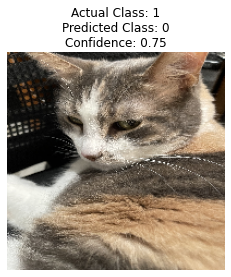

In [344]:
model_path = 'my_trained_model6.h5'
class_labels = ['0', '1', '2']  # Replace with your class labels
# image_path = 'test.jpg'
# image_path = 'test2.jpg'
image_path = 'test3.jpg'
# image_path = 'test/asha/asha1Z0_1.jpg'
# image_path = 'test/asha/asha20Z120_1.jpg'
# image_path = 'images/Asha/asha3Z30_1.jpg'
predict_single_image(model_path, image_path, class_labels)

In [329]:
# Making predictions on the test data
y_pred_test = model_6.predict(x_test_normalized)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)

# Calculating the probability of the predicted class
y_pred_test_max_probas = np.max(y_pred_test, axis = 1)

8/8 [==============================] - 6s 474ms/step


              precision    recall  f1-score   support

           0       0.90      0.81      0.85        69
           1       0.86      0.86      0.86       116
           2       0.82      0.90      0.86        71

    accuracy                           0.86       256
   macro avg       0.86      0.86      0.86       256
weighted avg       0.86      0.86      0.86       256



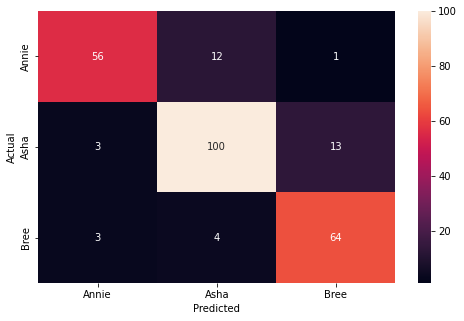

In [330]:
# Importing required functions
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, y_pred_test_classes))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred_test_classes)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Annie', 'Asha', 'Bree'], yticklabels = ['Annie', 'Asha', 'Bree'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

# Display the plot
plt.show()

In [336]:
# Use numpy.unique to get unique values and their counts
unique_values, counts = np.unique(y_test, return_counts=True)

# Zip the unique values and their counts together
value_count_pairs = list(zip(unique_values, counts))

# Print the count of each unique value
for value, count in value_count_pairs:
    print(f"{value}: {count} times")

0: 69 times
1: 116 times
2: 71 times


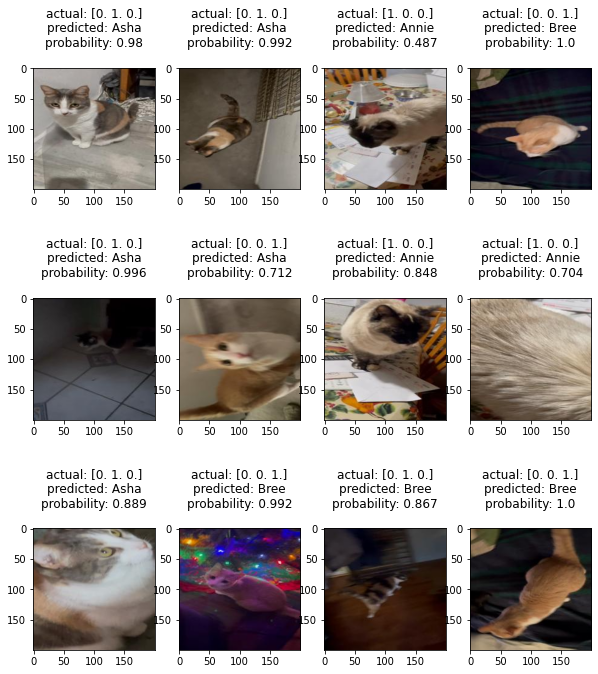

In [331]:
cat_classes = ['Annie', 'Asha', 'Bree']

rows = 3

cols = 4

fig = plt.figure(figsize = (10, 12))

for i in range(cols):

    for j in range(rows):

        random_index = np.random.randint(0, len(y_test))

        ax = fig.add_subplot(rows, cols, i * rows + j + 1)

        ax.imshow(x_test[random_index, :])

        pred_label = cat_classes[y_pred_test_classes[random_index]]

        pred_proba = y_pred_test_max_probas[random_index]

        true_label = y_test_encoded[random_index]
        

        ax.set_title("actual: {}\npredicted: {}\nprobability: {:.3}\n".format(
               true_label, pred_label, pred_proba
        ))
plt.show()

# Grad-CAM

In [4]:
# !pip install tf-explain

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# from tf_keras_vis.gradcam import Gradcam
# import tf_keras_vis.utils as vis_utils

In [4]:
# import tf_keras_vis
# print("tf_keras_vis version:", tf_keras_vis.__version__)

tf_keras_vis version: 0.8.5


In [37]:
# def generate_gradcam_for_layers(model, x_test, y_test):
#     """
#     Generate Grad-CAM visualizations for each layer in the model.

#     Args:
#         model (tf.keras.Model): The pre-trained model.
#         x_test (np.ndarray): Test images as a numpy array.
#         y_test (np.ndarray): True class labels as a numpy array.

#     Returns:
#         None
#     """

#     for layer in model.layers:
#         if 'conv' in layer.name.lower():
#             print(f"Visualizing Layer: {layer.name}")

#             # gradcam = Gradcam(model, layer.name)  # Create an instance of Gradcam

#             # Pass a seed_input argument to the Gradcam constructor.
#             # This can be any NumPy array.
#             # seed_input = np.random.randn(1, 224, 224, 3)
#             gradcam = Gradcam(model, layer.name)

#             for i in range(len(x_test)):
#                 img = x_test[i]
#                 img = np.expand_dims(img, axis=0)

#                 # Get the true class index from y_test
#                 class_index = np.argmax(y_test[i])

#                 # Generate Grad-CAM heatmap
#                 cam = gradcam(img)
#                 heatmap = cam[0, :, :]

#                 # Resize the heatmap to match the original image size
#                 heatmap = cv2.resize(heatmap, (img.shape[2], img.shape[1]))

#                 # Normalize the heatmap values
#                 heatmap = np.uint8(255 * heatmap)

#                 # Apply a colormap to the heatmap
#                 heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

#                 # Overlay the heatmap on the original image
#                 superimposed_img = cv2.addWeighted(img[0], 0.6, heatmap, 0.4, 0)

#                 # Display the original image with the Grad-CAM heatmap
#                 plt.figure(figsize=(8, 4))
#                 plt.subplot(1, 2, 1)
#                 plt.title(f"Original Image (True Class {class_index})")
#                 plt.imshow(x_test[i])

#                 plt.subplot(1, 2, 2)
#                 plt.title("Grad-CAM")
#                 plt.imshow(superimposed_img)
#                 plt.show()

In [39]:
# test_model = tf.keras.models.load_model('my_trained_model3.h5')

In [43]:
# for layer in test_model.layers:
#     print(layer.name)

conv2d
leaky_re_lu
conv2d_1
leaky_re_lu_1
max_pooling2d
flatten
dense
leaky_re_lu_2
dense_1


In [5]:
# # Load the pre-trained model
# model = tf.keras.models.load_model('my_trained_model3.h5')

# # Get the first image and label from the test set
# img = x_test[0]
# label = y_test[0]

# # Expand the image dimension
# img = np.expand_dims(img, axis=0)

# def highlight_conv2d_layer(model):
#   conv2d_output = tf.keras.backend.get_output_at_layer(model, "conv2d")
#   return tf.keras.Model(inputs=model.inputs, outputs=conv2d_output)

# # Create a Gradcam object for the first layer
# gradcam = Gradcam(model, highlight_conv2d_layer(model))

# # Generate the Grad-CAM heatmap
# cam = gradcam(img)
# heatmap = cam[0, :, :]

# # Resize the heatmap to match the original image size
# heatmap = cv2.resize(heatmap, (img.shape[2], img.shape[1]))

# # Normalize the heatmap values
# heatmap = np.uint8(255 * heatmap)

# # Apply a colormap to the heatmap
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# # Overlay the heatmap on the original image
# superimposed_img = cv2.addWeighted(img[0], 0.6, heatmap, 0.4, 0)

# # Display the original image with the Grad-CAM heatmap
# plt.figure(figsize=(8, 4))
# plt.subplot(1, 2, 1)
# plt.title(f'Original Image (True Class {label})')
# plt.imshow(img[0])

# plt.subplot(1, 2, 2)
# plt.title('Grad-CAM (First Layer)')
# plt.imshow(superimposed_img)
# plt.show()

AttributeError: module 'tensorflow.keras.backend' has no attribute 'get_output_at_layer'